In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def noise(data):
    noise = np.random.normal(0, np.abs(0 * data), size=data.shape)#noise=0; 0.01; 0.005
    noisy_data = data + noise
    return noisy_data

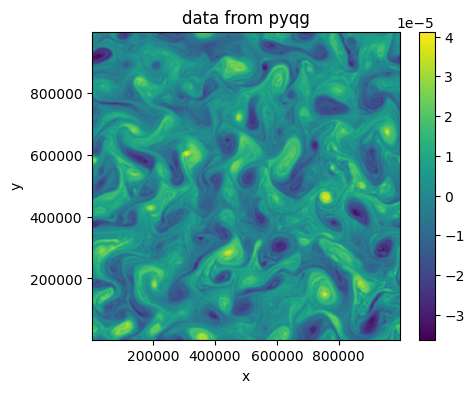

In [35]:
# Загрузка данных
x = np.load('x_eddy_noforce_q.npy')
y = np.load('y_eddy_noforce_q.npy')
data = np.load('data_eddy_noforce_q.npy')

# Визуализация данных
plt.figure(figsize=(5, 4))
plt.title('data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()


In [36]:
data.shape

(256, 256)

In [37]:
data 

array([[ 5.81822000e-06,  4.30405925e-06,  7.19066985e-07, ...,
         6.78768335e-06,  7.58292037e-06,  7.31560660e-06],
       [ 8.92766629e-06,  7.79198016e-06,  2.89533677e-06, ...,
         5.92428178e-06,  6.23410527e-06,  7.77690293e-06],
       [ 7.26184908e-06,  6.70022438e-06,  1.81355037e-06, ...,
         4.28680978e-06,  5.04354660e-06,  5.86545324e-06],
       ...,
       [ 6.63542337e-07,  6.65876311e-06,  5.10370316e-06, ...,
         5.92680256e-06,  1.42034269e-06, -2.89272747e-06],
       [-1.67279178e-06,  3.20473989e-06,  1.73478568e-06, ...,
         7.17552068e-06,  5.91884668e-06, -9.85424333e-07],
       [ 1.61836441e-06,  2.63035484e-06,  4.26930353e-07, ...,
         6.86886787e-06,  8.23003051e-06,  4.36341352e-06]])

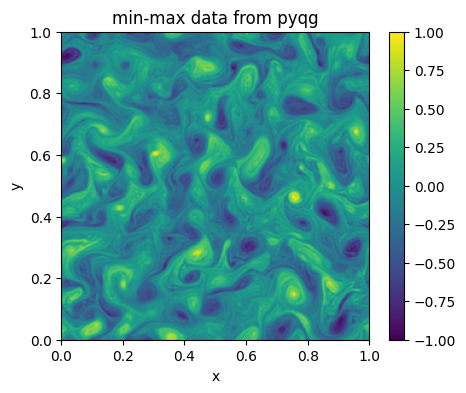

In [38]:
# Масштабирование сетки от 0 до 1
x = (x - np.min(x)) / (np.max(x) - np.min(x))

y = (y - np.min(y)) / (np.max(y) - np.min(y))

#масштабирование данных до -1 до 1
data = 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1
#print(data)

# Визуализация данных
np.save('x_eddy_noforce_q_scaled.npy', x)
np.save('y_eddy_noforce_q_scaled.npy', y)
plt.figure(figsize=(5, 4))
plt.title('min-max data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

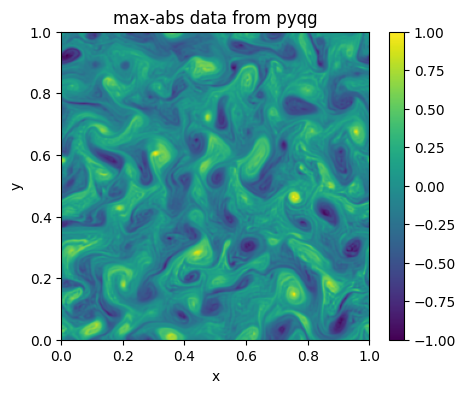

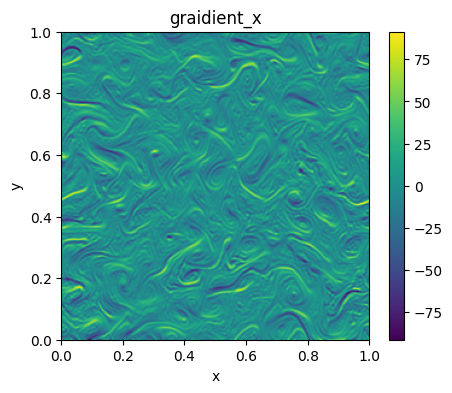

In [39]:
dx = x[-1] / len(x)
dy = y[-1] / len(y)

gradient_x = np.gradient(data,dx, axis = 0, edge_order=2)
gradient_y = np.gradient(data, dy, axis = 1, edge_order=2)
gradient_xx = np.gradient(gradient_x, dx, axis = 0, edge_order=2)
gradient_yy = np.gradient(gradient_y, dy, axis = 1, edge_order=2)

# Визуализация данных
plt.figure(figsize=(5, 4))
plt.title('max-abs data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 4))
plt.title('graidient_x')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_x, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

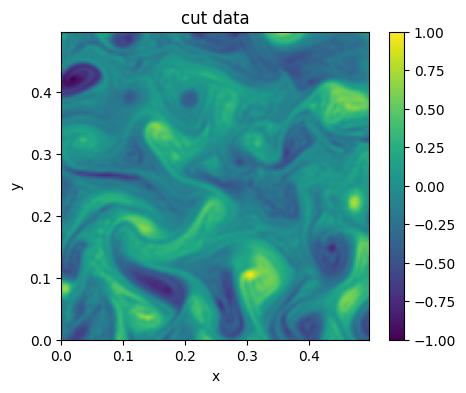

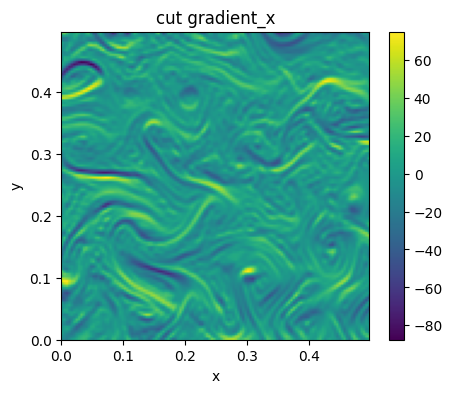

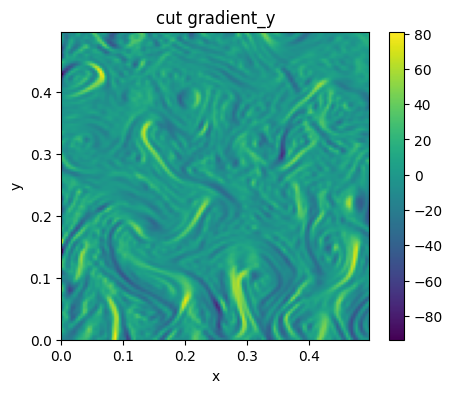

In [40]:
#обрезаем данные, если ранее не делали этого 
x = x[0:128]
y = y[0:128]
data = data[0:128,0:128]
gradient_x = gradient_x[0:128,0:128]
gradient_y = gradient_y[0:128,0:128]
gradient_xx = gradient_xx[0:128,0:128]
gradient_yy = gradient_yy[0:128,0:128]

plt.figure(figsize=(5, 4))
plt.title('cut data')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 4))
plt.title('cut gradient_x')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_x, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 4))
plt.title('cut gradient_y')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(gradient_y, extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
plt.colorbar()
plt.show()

In [41]:
data = noise(data)

In [42]:
np.save('data_pyqg_noise0.npy', data)
np.save('x_pyqg_noise0.npy', x)
np.save('y_pyqg_noise0.npy', y)

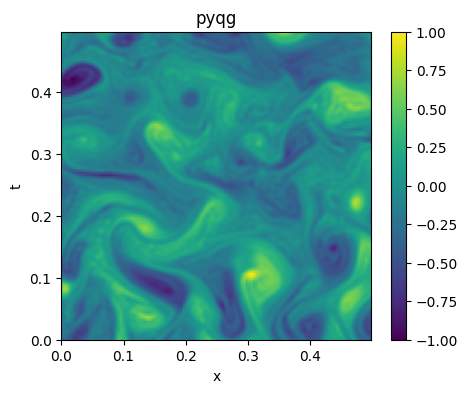

In [43]:
u = np.load('data_pyqg_noise0.npy')
x = np.load('x_pyqg_noise0.npy')
y = np.load('y_pyqg_noise0.npy')

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('pyqg')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [44]:
u

array([[ 0.08608455,  0.04698804, -0.04557855, ..., -0.00815931,
         0.01282841,  0.06490527],
       [ 0.16637226,  0.13704819,  0.010614  , ..., -0.02226063,
        -0.00660627,  0.02336806],
       [ 0.12335989,  0.10885842, -0.01731835, ..., -0.09903415,
        -0.04833953, -0.00769048],
       ...,
       [-0.2017213 , -0.20655925, -0.23606052, ..., -0.40994623,
        -0.54803763, -0.60159524],
       [-0.20011088, -0.24207767, -0.30313158, ..., -0.32579614,
        -0.41514042, -0.46910458],
       [-0.24289293, -0.29912523, -0.37236008, ..., -0.34092992,
        -0.34968555, -0.35139891]])

In [45]:
a = u[:, 0]#левая
b = u[0, :]#верхняя
c = u[:, -1]#правая
d = u[-1, :]#нижняя
print(d)

[-2.42892931e-01 -2.99125234e-01 -3.72360083e-01 -4.44976975e-01
 -5.30526728e-01 -5.96305053e-01 -6.00751981e-01 -5.50076272e-01
 -4.78438257e-01 -3.95525412e-01 -2.95305866e-01 -2.01121011e-01
 -1.57690528e-01 -1.89320148e-01 -2.39062418e-01 -2.22835307e-01
 -1.86010007e-01 -1.85883691e-01 -1.75999293e-01 -2.10864617e-01
 -3.03543442e-01 -2.02728848e-01  1.45090537e-01  4.00313803e-01
  3.90641559e-01  3.16592862e-01  2.95066070e-01  1.36653412e-01
 -1.58733861e-01 -2.42273364e-01 -1.11324484e-01 -7.59230010e-02
 -1.01469840e-01 -7.41810060e-02 -7.85457710e-02 -9.84626408e-02
 -1.04164703e-01 -1.31466025e-01 -1.16453131e-01 -3.42028857e-02
  8.51507130e-03 -8.57406803e-02 -2.75206616e-01 -3.58608037e-01
 -2.46506979e-01 -1.17830590e-01 -9.90992392e-02 -1.15127645e-01
 -1.18412065e-01 -1.36030339e-01 -1.59194783e-01 -1.76137550e-01
 -2.00709732e-01 -2.07374502e-01 -1.40895036e-01 -5.55345556e-04
  1.48348399e-01  2.48662039e-01  3.11065535e-01  3.78285649e-01
  4.27666425e-01  3.76609

In [46]:
for i in range(1, 127):
    for j in range(1, 127):
       du_dx = 0.0017746995703283586 / (0.9170663990502759 - np.cos(1.6271128573504867 * y[j]))  # Вычисление производной
       u[i, j] = u[i-1, j] + du_dx * (x[i] - x[i-1])  # Обновление значения u



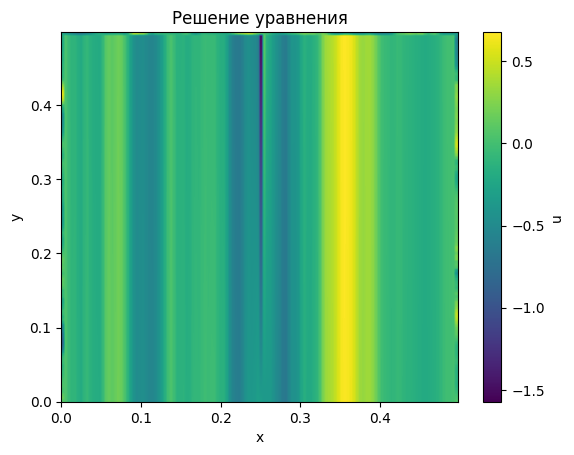

In [47]:
plt.imshow(u, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', aspect='auto')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение уравнения')
plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры
n = 128
L = 1.0  # Длина области
x = np.linspace(0, L, n)
y = np.linspace(0, L, n)

X, Y = np.meshgrid(x, y)

# Инициализация переменной u
u = np.zeros((n, n))

# Граничные условия


u[0, :] = a  # Граница y=0
u[-1, :] = c  # Граница y=L
u[:, 0] = d  # Граница x=0
u[:, -1] = b  # Граница x=L

# Установка начальных условий (можно попробовать разные значения)
u[1:-1, 1:-1] = 0.5  # Начальные условия внутри области

tolerance = 1e-5
max_iterations = 5000
iteration = 0

# Итерационный процесс методом Гаусса-Зейделя
while iteration < max_iterations:
    u_old = u.copy()

    for i in range(1, n-1):
        for j in range(1, n-1):
            dx = (x[1] - x[0])
            dy = (y[1] - y[0])

            du_dx = (u[i+1, j] - u[i-1, j]) / (2 * dx)
            du_dy = (u[i, j+1] - u[i, j-1]) / (2 * dy)

            new_u_value = (du_dx * (-0.3676 * np.cos(3.0398 * X[i, j]) + 0.51 - Y[i, j]) -
                           0.00012 * du_dy + 0.00087202)

            new_u_value = np.clip(new_u_value, -1, 1) 

            # Обновляем значение u[i,j] сразу
            u[i, j] = new_u_value

    # Проверяем на сходимость
    max_change = np.max(np.abs(u - u_old))
    print(f"Итерация {iteration}: максимальное изменение {max_change}")

    if max_change < tolerance:
        print(f"Решение сошлось за {iteration} итераций.")
        break

    iteration += 1

# Проверка на NaN значения после завершения итераций
if not (np.any(np.isnan(u)) or np.any(np.isinf(u))):
    print("Решение успешно найдено и не содержит NaN значений.")

    # Визуализация результата
    plt.imshow(u, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', aspect='auto')
    plt.colorbar(label='u(x,y)')
    plt.title('Решение уравнения')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
else:
    print("Решение содержит NaN или Inf значения.")


Итерация 0: максимальное изменение 1.5
Итерация 1: максимальное изменение 2.0
Итерация 2: максимальное изменение 2.0
Итерация 3: максимальное изменение 2.0
Итерация 4: максимальное изменение 2.0
Итерация 5: максимальное изменение 2.0
Итерация 6: максимальное изменение 2.0
Итерация 7: максимальное изменение 2.0
Итерация 8: максимальное изменение 2.0
Итерация 9: максимальное изменение 2.0
Итерация 10: максимальное изменение 2.0
Итерация 11: максимальное изменение 2.0
Итерация 12: максимальное изменение 2.0
Итерация 13: максимальное изменение 2.0
Итерация 14: максимальное изменение 2.0
Итерация 15: максимальное изменение 2.0
Итерация 16: максимальное изменение 2.0
Итерация 17: максимальное изменение 2.0
Итерация 18: максимальное изменение 2.0
Итерация 19: максимальное изменение 2.0
Итерация 20: максимальное изменение 2.0
Итерация 21: максимальное изменение 2.0
Итерация 22: максимальное изменение 2.0
Итерация 23: максимальное изменение 2.0
Итерация 24: максимальное изменение 2.0
Итерация 2

KeyboardInterrupt: 

In [50]:
u

array([[-2.42892931e-01,  1.66372263e-01,  1.23359892e-01, ...,
        -2.01721297e-01, -2.00110882e-01,  8.60845485e-02],
       [-2.99125234e-01,  2.00000000e+00,  2.00000000e+00, ...,
        -2.00000000e+00, -2.00000000e+00,  4.69880356e-02],
       [-3.72360083e-01, -2.00000000e+00, -2.00000000e+00, ...,
         2.00000000e+00,  2.00000000e+00, -4.55785534e-02],
       ...,
       [-3.40929923e-01, -2.00000000e+00,  2.00000000e+00, ...,
         2.00000000e+00, -7.95814503e-04, -8.15930622e-03],
       [-3.49685553e-01,  2.00000000e+00, -2.00000000e+00, ...,
        -2.00000000e+00, -1.49284521e+00,  1.28284090e-02],
       [-3.51398906e-01,  2.33680564e-02, -7.69047613e-03, ...,
        -6.01595244e-01, -4.69104576e-01,  6.49052688e-02]])

In [19]:
import numpy as np

# Определение шага сетки
dx = x[1] - x[0]
dy = y[1] - y[0]

u = np.zeros((len(x), len(y)))

# Задание граничных условий
u_bottom = d  # u(y=0)
u_top = b      # u(y=1)
u_left = a    # u(x=0)
u_right = c    # u(x=1)
u[0, :] = u_bottom   # нижняя граница
u[-1, :] = u_top     # верхняя граница
u[:, 0] = u_left     # левая граница
u[:, -1] = u_right   # правая граница

# Цикл по ячейкам сетки
for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        # Вычисление значения функции в текущей ячейке
        u[i, j] = (0.00012705448881998612*(u[i+1, j]+u[i-1, j])/dy + 0.5148828740033955*(u[i, j+1]+u[i, j-1])/dx - 0.36762583887256656*(u[i+1, j]-u[i-1, j])*np.cos(3.039845423152682*x[i]) + 0.000872022240310963) / (1/(2*dx * y[j]))

# Решение уравнения численно
solution = u

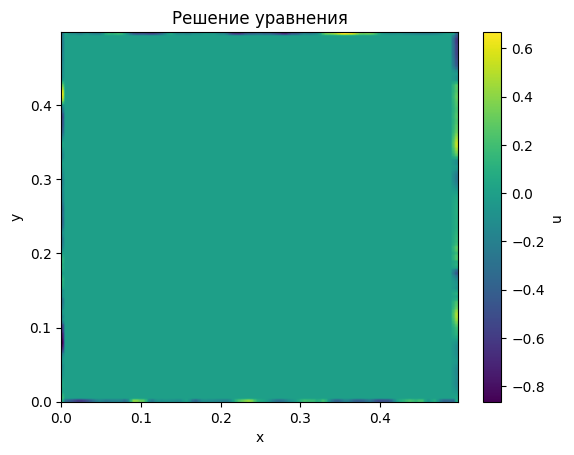

In [20]:
plt.imshow(solution, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', aspect='auto')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение уравнения')
plt.show()

In [96]:
solution

array([[ 8.60845485e-02, -2.99125234e-01, -3.72360083e-01, ...,
        -3.40929923e-01, -3.49685553e-01,  6.49052688e-02],
       [ 1.66372263e-01,  6.68207328e-04, -3.71174928e-06, ...,
        -9.67987077e-04,  1.08590331e-02,  2.33680564e-02],
       [ 1.23359892e-01,  4.98198930e-04,  4.07730150e-06, ...,
         4.16748678e-06, -3.89077980e-03, -7.69047613e-03],
       ...,
       [-2.01721297e-01, -8.14585392e-04, -6.52546045e-06, ...,
         6.66604477e-06, -3.06173750e-01, -6.01595244e-01],
       [-2.00110882e-01, -8.08071486e-04, -6.49287256e-06, ...,
         5.24906551e-06, -2.38754343e-01, -4.69104576e-01],
       [-2.42892931e-01,  4.69880356e-02, -4.55785534e-02, ...,
        -8.15930622e-03,  1.28284090e-02, -3.51398906e-01]])

In [92]:
np.mean(solution)

-0.0025166390145954054

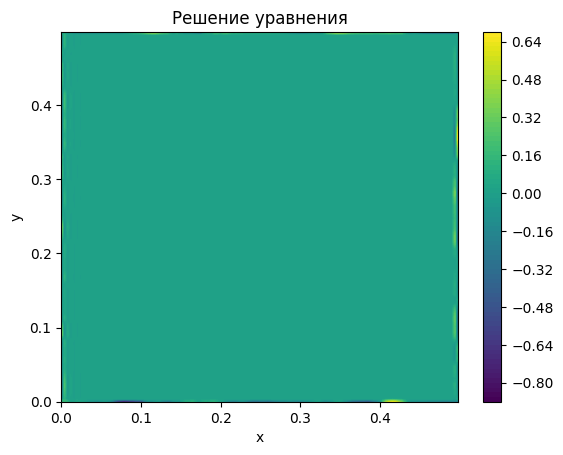

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Задаем размеры сетки
n = 128
X, Y = np.meshgrid(x, y)

# Параметры уравнения
alpha = -0.00012
beta = 0.5148
gamma = -0.3676
const = 0.00087202

# Граничные условия (пример, можно заменить на свои значения)
u_bottom = d  # u(y=0)
u_top = b      # u(y=1)
u_left = a    # u(x=0)
u_right = c    # u(x=1)

# Создаем массив решения
u = np.zeros((n, n))

# Заполняем граничные условия
u[0, :] = u_bottom   # нижняя граница
u[-1, :] = u_top     # верхняя граница
u[:, 0] = u_left     # левая граница
u[:, -1] = u_right   # правая граница

# Решение системы уравнений
for j in range(1, n-1):
    for i in range(1, n-1):
        # Апроксимируем уравнение конечными разностями
        u_xx = (u[i+1, j] - 2*u[i, j] + u[i-1, j])  # Вторая производная по x
        u_yy = (u[i, j+1] - 2*u[i, j] + u[i, j-1])  # Вторая производная по y

        u[i, j] = (const - beta * u_xx + alpha * u_yy) / (1 - gamma * np.cos(3.0398 * x[i]))

# Визуализация результата
plt.contourf(X, Y, u.T, levels=100)
plt.colorbar()
plt.title('Решение уравнения')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [76]:
u*10000

array([[ 8.60845485e+02, -2.99125234e+03, -3.72360083e+03, ...,
        -3.40929923e+03, -3.49685553e+03,  6.49052688e+02],
       [ 1.66372263e+03,  1.13223664e+03,  1.40796345e+03, ...,
         1.28963375e+03,  1.32257471e+03,  2.33680564e+02],
       [ 1.23359892e+03, -4.19967190e+02, -5.23620715e+02, ...,
        -4.79068875e+02, -4.91463796e+02, -7.69047613e+01],
       ...,
       [-2.01721297e+03,  5.80127234e+00,  5.65108724e+00, ...,
         5.65109814e+00,  6.11105318e+00, -6.01595244e+03],
       [-2.00110882e+03, -2.30107438e+02,  2.34551623e+02, ...,
         4.66300998e+01, -5.84329177e+01, -4.69104576e+03],
       [-2.42892931e+03,  4.69880356e+02, -4.55785534e+02, ...,
        -8.15930622e+01,  1.28284090e+02, -3.51398906e+03]])